## Load datasets

In [2]:
import os
from urllib.request import urlretrieve



def download_dataset():

    urls = [
        ("1PWLqXQZzcBOcxNZVTRsro2H3xWjwzhHC",
        "TMDB_movie_dataset_v11.csv"),
        ("15Nz4ldGeVGYK8znnPnhvtQL6GoL0hE2_",
        "letterboxd_data.csv"),
        ("1DcyGoLsT8vvDwQX-tOge8YBlWURaCzfl",
        "imdb.csv")
    ]

    for (fileId, filename) in urls:
        urlretrieve(f"https://drive.usercontent.google.com/download?id={fileId}&export=download&authuser=1&confirm=t", f"./{filename}")

download_dataset()

In [3]:
import pandas as pd

# Datasets for general data
letterboxd_data = pd.read_csv("letterboxd_data.csv")  # https://www.kaggle.com/datasets/samlearner/letterboxd-movie-ratings-data : movie_data.csv
imdb_data = pd.read_csv("imdb.csv")                   # ASK LILY

# Datasets for budget data
tmdb_data = pd.read_csv("TMDB_movie_dataset_v11.csv") # https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies

# Select useful columns from datasets and show preliminar info

#### Letterboxd Dataset

In [4]:
letterboxd_data_drop_imdb_dup = letterboxd_data.drop_duplicates(['imdb_id'])
letterboxd_data = letterboxd_data_drop_imdb_dup.drop_duplicates(['tmdb_id'])
letterboxd_data.shape

(234170, 19)

In [5]:
# Get rid of unuseful columns
columns_to_drop = ['_id', 'image_url', 'imdb_link', 'movie_id', 'tmdb_link', 'runtime', 'spoken_languages']
columns_to_rename = {'genres' : 'genre_letterboxd',
                     'movie_title': 'title',
                     'overview' : 'description_letterboxd',
                     'year_released': 'year',
                     'vote_average': 'rating_letterboxd',
                     'vote_count': 'vote_count_letterboxd'}

try:
  letterboxd_data.drop(columns_to_drop, axis=1, inplace=True)
  letterboxd_data.rename(columns=columns_to_rename, inplace=True)
except:
  print("Something went wrong removing or renaming columns. Possibly there were removed/renamed previously.")

letterboxd_data.columns

<ipython-input-5-57699ce4406d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  letterboxd_data.drop(columns_to_drop, axis=1, inplace=True)
<ipython-input-5-57699ce4406d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  letterboxd_data.rename(columns=columns_to_rename, inplace=True)


Index(['genre_letterboxd', 'imdb_id', 'title', 'original_language',
       'description_letterboxd', 'popularity', 'production_countries',
       'release_date', 'tmdb_id', 'rating_letterboxd', 'vote_count_letterboxd',
       'year'],
      dtype='object')

In [6]:
# Get rid of unuseful columns
columns_to_drop = ['Unnamed: 0', 'Unnamed: 1', 'certificate', 'year', 'movie_name', 'runtime']
columns_to_rename = {'movie_id' : 'imdb_id',
                     'genre' : 'genre_imdb',
                     'description' : 'description_imdb',
                     'gross(in $)' : 'gross',
                     'rating' : 'rating_imdb',
                     'votes' : 'vote_count_imdb'}

try:
  imdb_data.drop(columns_to_drop, axis=1, inplace=True)
  imdb_data.rename(columns=columns_to_rename, inplace=True)
except:
  print("Something went wrong removing or renaming columns. Possibly there were removed/renamed previously.")


imdb_data.columns

Index(['imdb_id', 'genre_imdb', 'rating_imdb', 'description_imdb', 'director',
       'director_id', 'star', 'star_id', 'vote_count_imdb', 'gross'],
      dtype='object')

In [7]:
# Get rid of unuseful columns
columns_to_drop = ['vote_average',
                   'vote_count',
                   'status',
                   'release_date',
                   'backdrop_path',
                   'homepage',
                   'imdb_id',
                   'original_language',
                   'original_title',
                   'popularity',
                   'poster_path',
                   'tagline',
                   'production_countries',
                   'title'
                   ]
columns_to_rename = { 'id' : 'tmdb_id',
                      'overview' : 'description_tmdb',
                      'genres' : 'genre_tmdb',
                    }

try:
  tmdb_data.drop(columns_to_drop, axis=1, inplace=True)
  tmdb_data.rename(columns=columns_to_rename, inplace=True)

except:
  print("Something went wrong removing or renaming columns. Possibly there were removed/renamed previously.")

tmdb_data.columns


Index(['tmdb_id', 'revenue', 'runtime', 'adult', 'budget', 'description_tmdb',
       'genre_tmdb', 'production_companies', 'spoken_languages'],
      dtype='object')

In [8]:
tmdb_data = tmdb_data.drop_duplicates(['tmdb_id'])
tmdb_data.size

9127134

### Show columns of each datasets

# Data Vizualization







### Overview

<ipython-input-9-07d9ee8c68b2>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Visualizaciones para Letterboxd:


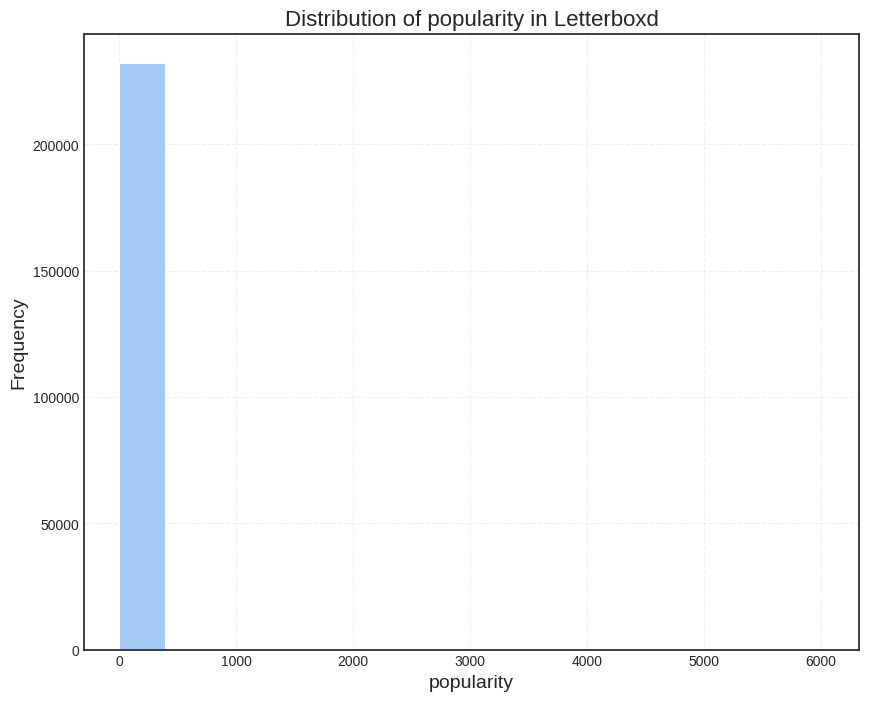

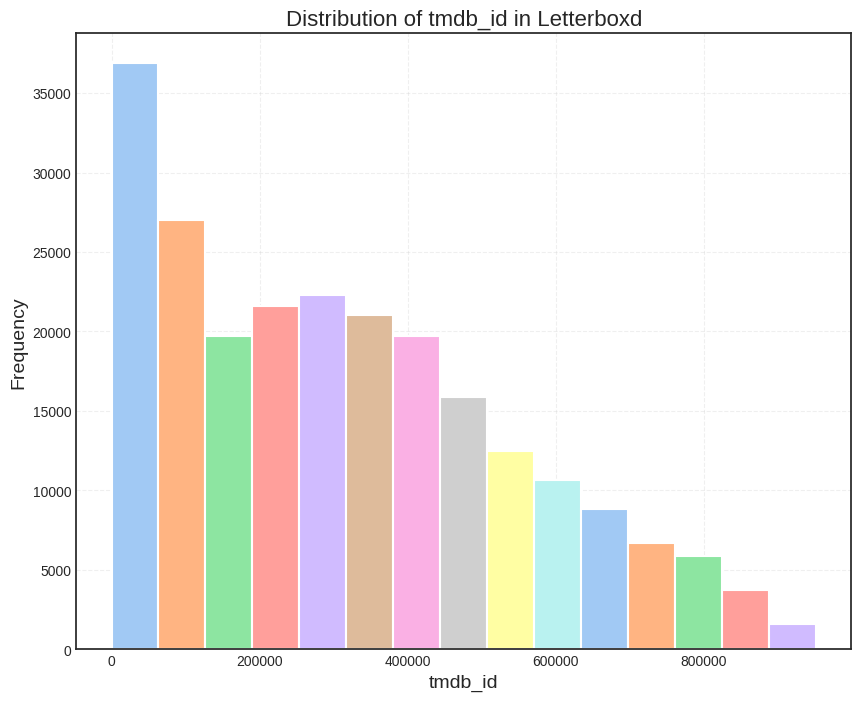

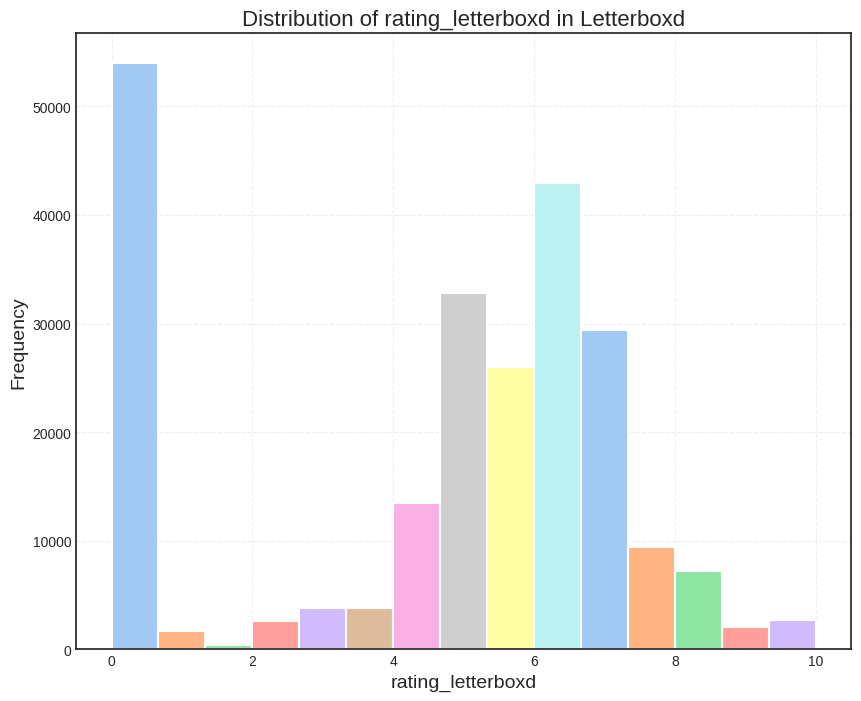

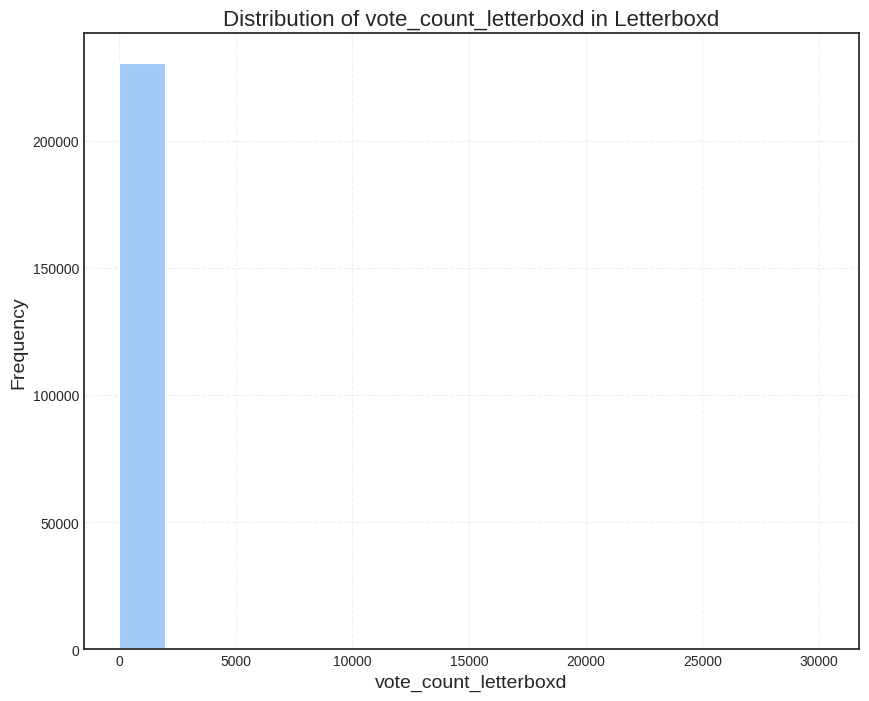

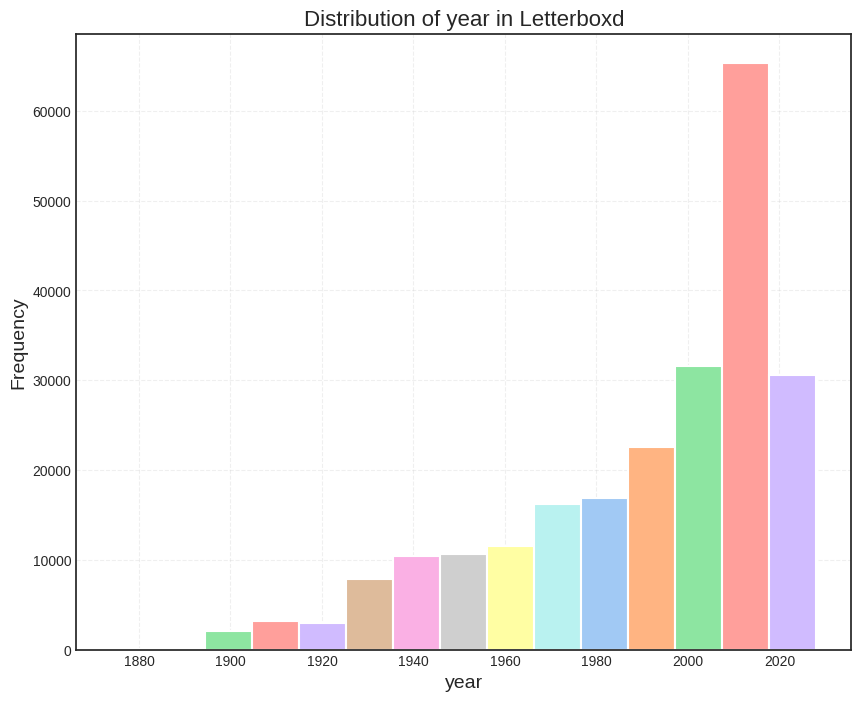



Visualizaciones para IMDB:


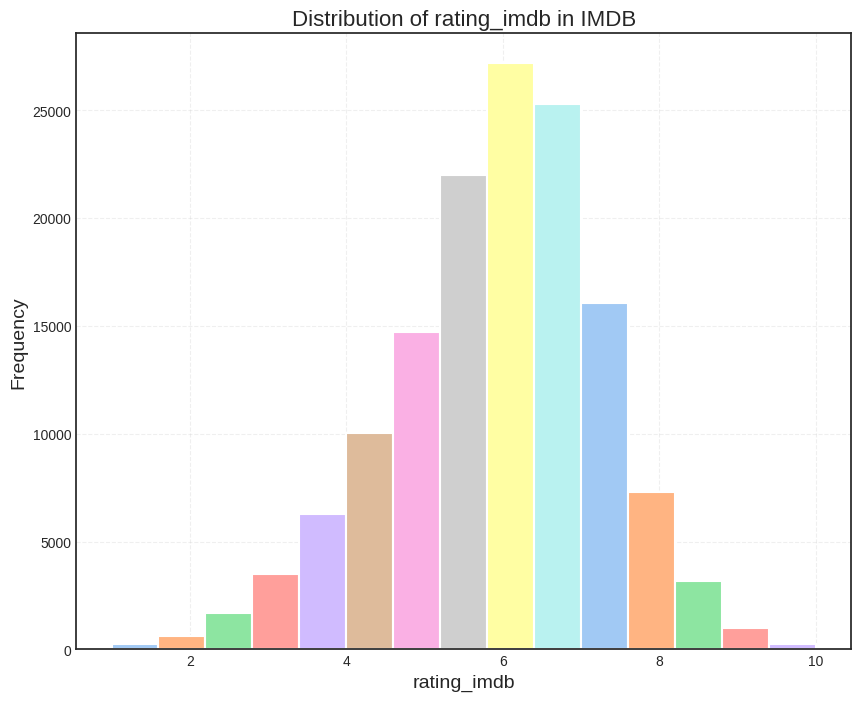

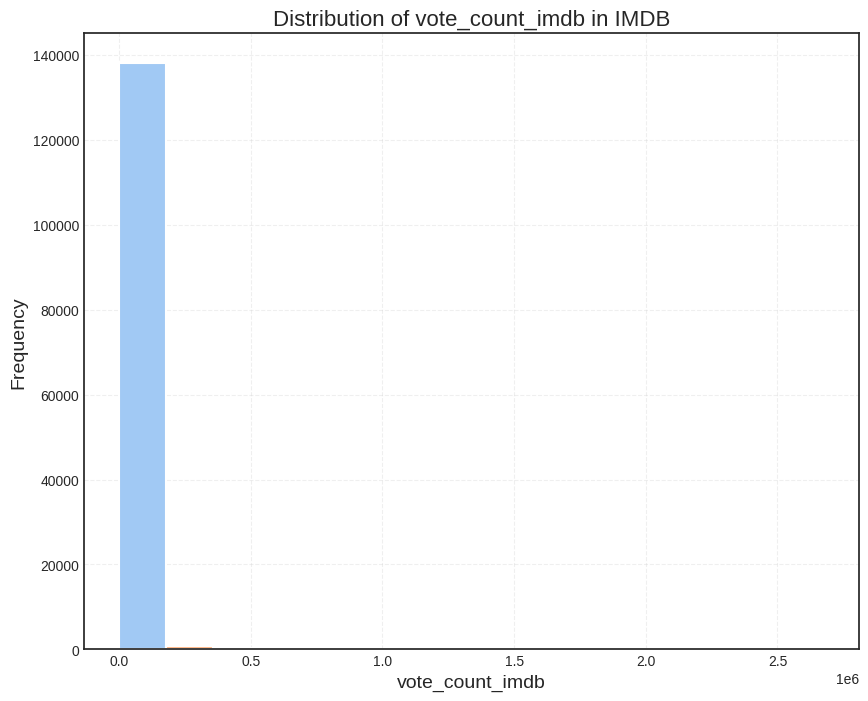

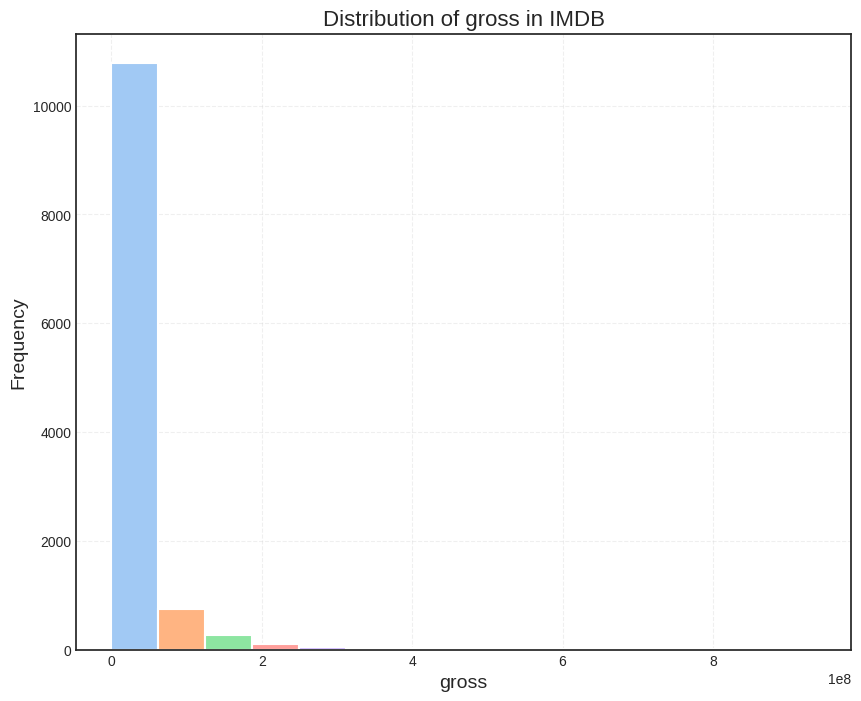

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Establecer una paleta de colores pastel
pastel_palette = sns.color_palette("pastel")
sns.set_palette(pastel_palette)

# Aplicar un estilo de gráfico más limpio y suave
plt.style.use('seaborn-white')

# Dataframes dictionaries
dataframes = {
    'Letterboxd': letterboxd_data,
    'IMDB': imdb_data
}

# Visualizations generations
for platform, data in dataframes.items():
    print(f"Visualizaciones para {platform}:")

    # Distribution histograms
    numeric_cols = data.select_dtypes(include='number').columns
    for col in numeric_cols:
        plt.figure(figsize=(10, 8))
        n, bins, patches = plt.hist(data[col].dropna(), bins=15, edgecolor='white', linewidth=1.5)
        # Colorear cada barra con un color pastel diferente
        for i, patch in enumerate(patches):
            patch.set_facecolor(pastel_palette[i % len(pastel_palette)])
        plt.title(f"Distribution of {col} in {platform}", fontsize=16)
        plt.xlabel(col, fontsize=14)
        plt.ylabel("Frequency", fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.3)
        plt.show()

    # Bar graphs for categories
    object_cols = data.select_dtypes(include='object').columns
    for col in object_cols:
        if data[col].nunique() <= 10:
            plt.figure(figsize=(10, 8))
            bar_data = data[col].value_counts()
            colors = sns.color_palette("pastel", n_colors=bar_data.size)
            bar_data.plot(kind='bar', color=colors, edgecolor='white', linewidth=1.5)
            plt.title(f"Count of {col} in {platform}", fontsize=16)
            plt.xlabel(col, fontsize=14)
            plt.ylabel("Frequency", fontsize=14)
            plt.xticks(rotation=45)
            plt.grid(True, linestyle='--', alpha=0.3)
            plt.show()

    print("\n")

## TMBD

<ipython-input-11-7224f16b1815>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_languages.index, y=top_languages.values, palette="pastel")


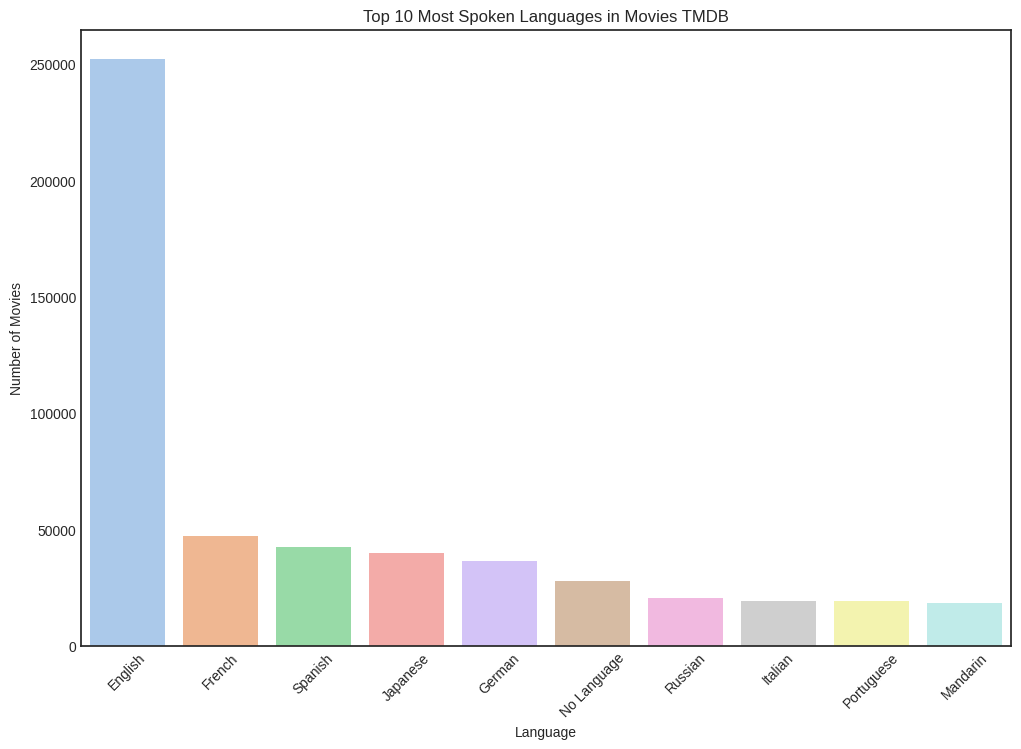

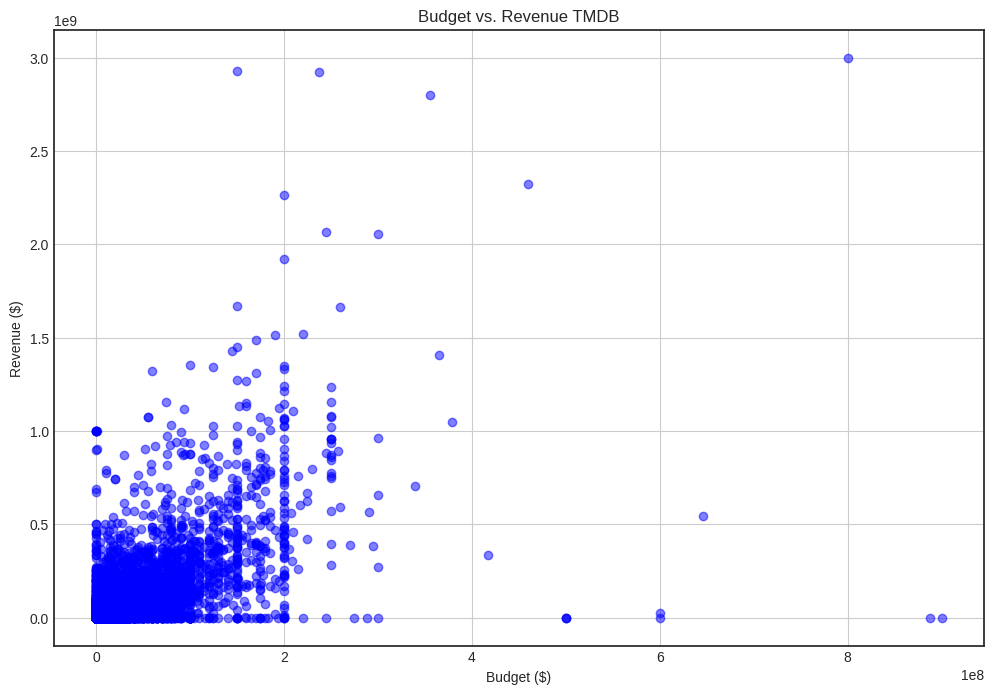

In [11]:

tmdb_data['languages'] = tmdb_data['spoken_languages'].str.split(', ')

language_counts = tmdb_data.explode('languages')['languages'].value_counts()
top_languages = language_counts.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_languages.index, y=top_languages.values, palette="pastel")
plt.xticks(rotation=45)
plt.title('Top 10 Most Spoken Languages in Movies TMDB')
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.show()

plt.figure(figsize=(12, 8))
plt.scatter(tmdb_data['budget'], tmdb_data['revenue'], alpha=0.5, color='blue')
plt.title('Budget vs. Revenue TMDB')
plt.xlabel('Budget ($)')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.show()

## IMDB

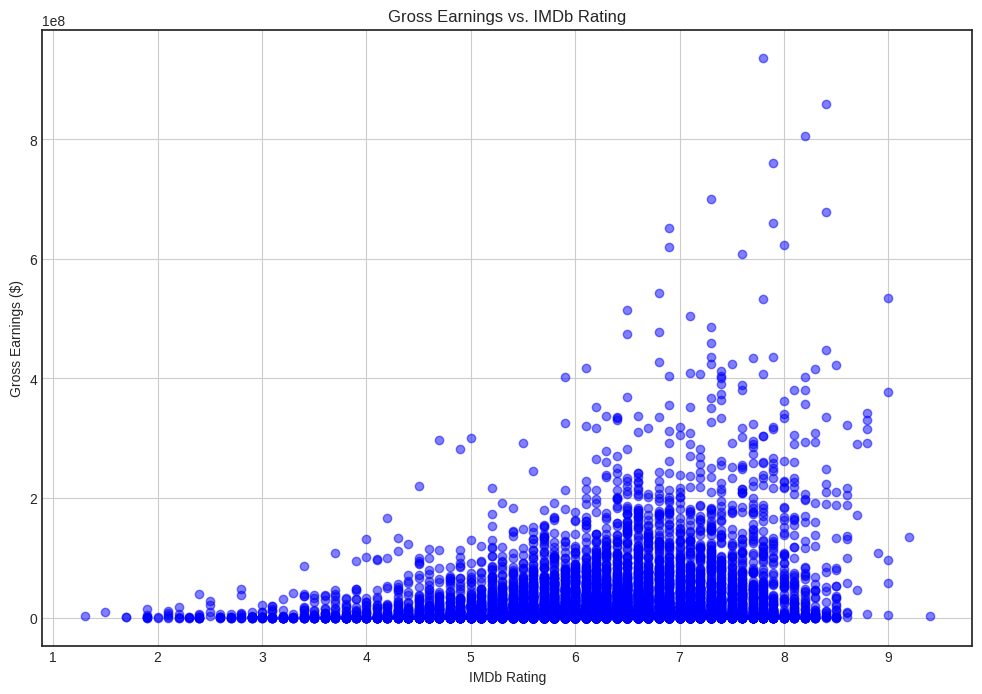

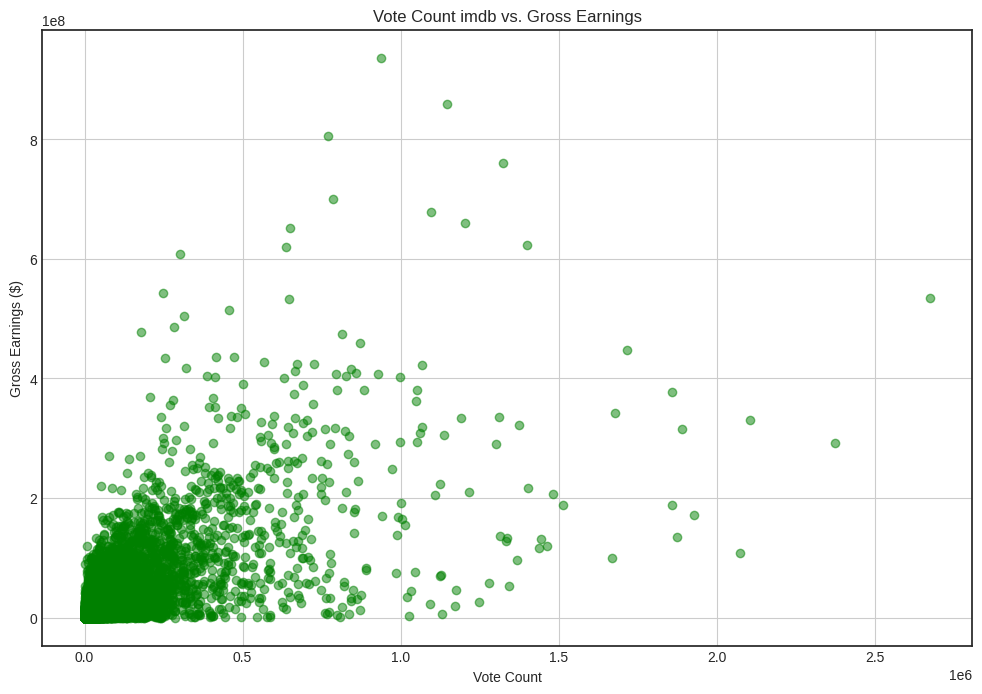

In [12]:
import matplotlib.pyplot as plt

# Suponiendo que imdb_data es tu DataFrame y contiene las columnas 'gross' y 'rating_imdb'
plt.figure(figsize=(12, 8))
plt.scatter(imdb_data['rating_imdb'], imdb_data['gross'], alpha=0.5, color='blue')
plt.title('Gross Earnings vs. IMDb Rating')
plt.xlabel('IMDb Rating')
plt.ylabel('Gross Earnings ($)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
plt.scatter(imdb_data['vote_count_imdb'], imdb_data['gross'], alpha=0.5, color='green')
plt.title('Vote Count imdb vs. Gross Earnings')
plt.xlabel('Vote Count')
plt.ylabel('Gross Earnings ($)')
plt.grid(True)
plt.show()

## Letterboxd

<ipython-input-13-b2e4ad7fdefd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  letterboxd_data['release_date'] = pd.to_datetime(letterboxd_data['release_date'])


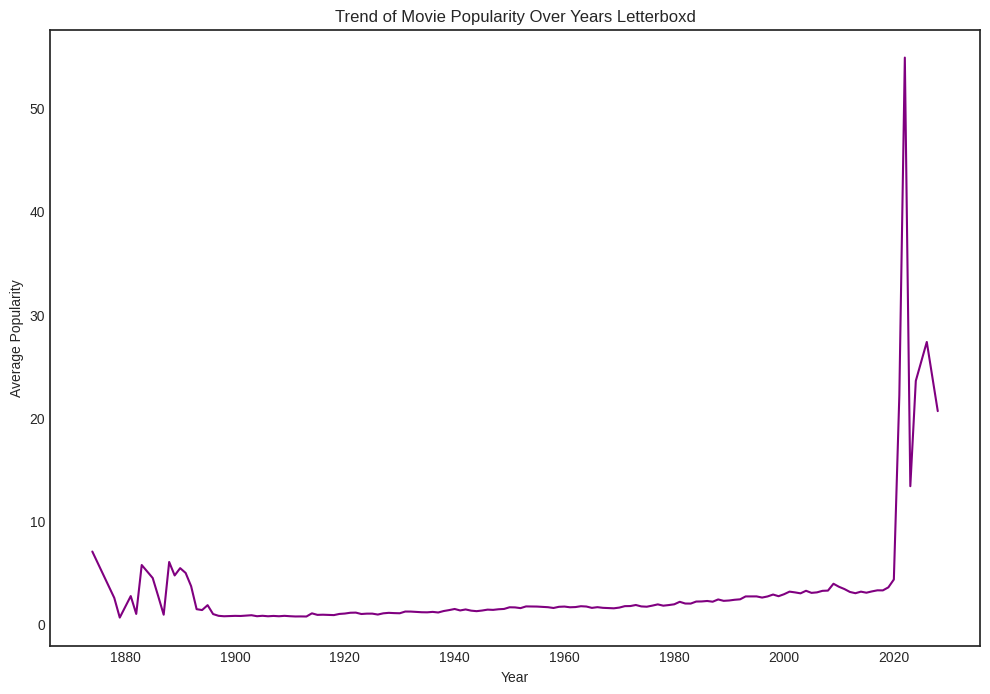

In [13]:
import pandas as pd

# Asegurarse de que 'release_date' está en formato datetime
letterboxd_data['release_date'] = pd.to_datetime(letterboxd_data['release_date'])

# Agrupar datos por año de lanzamiento y calcular la media de popularidad
popularity_trend = letterboxd_data.groupby(letterboxd_data['release_date'].dt.year)['popularity'].mean()

plt.figure(figsize=(12, 8))
plt.plot(popularity_trend.index, popularity_trend, color='purple')
plt.title('Trend of Movie Popularity Over Years Letterboxd')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.show()


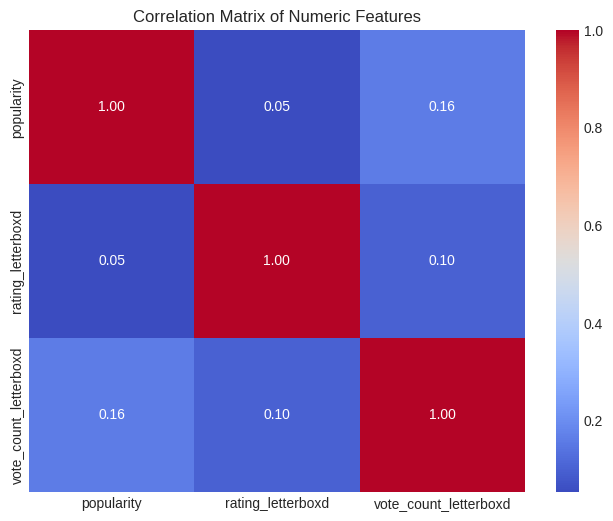

In [14]:
import seaborn as sns

# Selección de columnas numéricas
numeric_cols = ['popularity', 'rating_letterboxd', 'vote_count_letterboxd']

# Calculando la matriz de correlación
corr_matrix = letterboxd_data[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

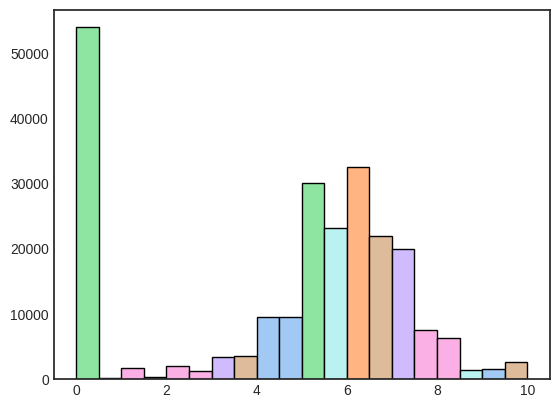

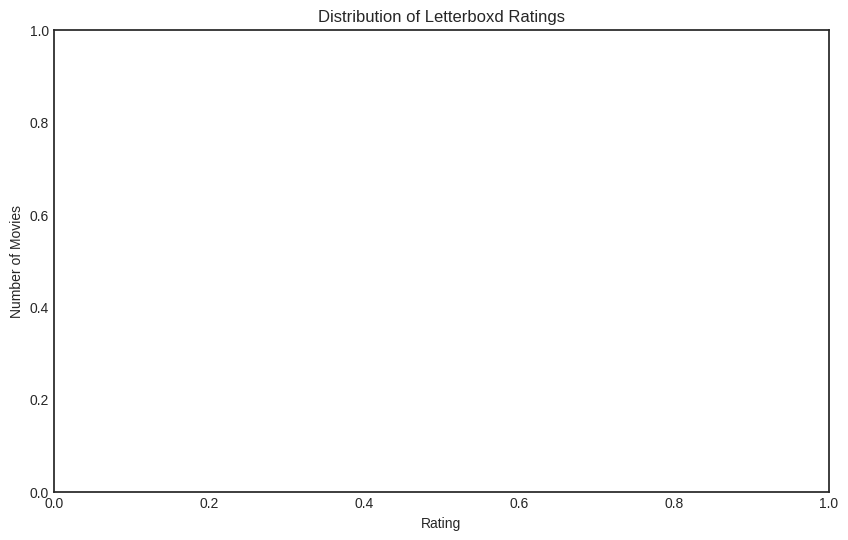

In [15]:
sns.set_palette(sns.color_palette("pastel"))
data = letterboxd_data['rating_letterboxd'].dropna()
counts, bins, patches = plt.hist(data, bins=20, edgecolor='black')

# Color each bin
for count, patch in zip(counts, patches):
    patch.set_facecolor(sns.color_palette("pastel")[int(count % len(sns.color_palette("pastel")))])

plt.figure(figsize=(10, 6))
plt.title('Distribution of Letterboxd Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.show()

# Data cleaning

Cleaning null values and null cell of the letterboxd dataset

In [16]:
columns_to_exclude = ['original_language',
                      'production_countries',
                      'release_date',
                      'spoken_languages',
                      'vote_count'
                      ]

letterboxd_data_clean = letterboxd_data.dropna(subset=[col for col in letterboxd_data.columns if col not in columns_to_exclude])
letterboxd_data_clean.shape

(220511, 12)

In [17]:
letterboxd_data_clean.shape


(220511, 12)

In [18]:

columns_to_exclude = ['runtime_imdb']

imdb_data_clean = imdb_data.dropna(subset=[col for col in imdb_data.columns if col not in columns_to_exclude])
imdb_data_clean.shape


(12034, 10)

In [19]:
columns_to_exclude = ['runtime_tmdb',
                      'spoken_languages']
tmdb_data_clean = tmdb_data.dropna(subset=[col for col in tmdb_data.columns if col not in columns_to_exclude])

tmdb_data_clean.shape

(283600, 10)

## Merging IMDB and Letterboxd datasets

In [20]:


imdb_data_merged_letterboxd = pd.merge(letterboxd_data_clean, imdb_data_clean, on=['imdb_id'], how='inner')
print(imdb_data_merged_letterboxd.shape)
print(imdb_data_merged_letterboxd.columns)
imdb_data_merged_letterboxd.info()


(11758, 21)
Index(['genre_letterboxd', 'imdb_id', 'title', 'original_language',
       'description_letterboxd', 'popularity', 'production_countries',
       'release_date', 'tmdb_id', 'rating_letterboxd', 'vote_count_letterboxd',
       'year', 'genre_imdb', 'rating_imdb', 'description_imdb', 'director',
       'director_id', 'star', 'star_id', 'vote_count_imdb', 'gross'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11758 entries, 0 to 11757
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   genre_letterboxd        11758 non-null  object        
 1   imdb_id                 11758 non-null  object        
 2   title                   11758 non-null  object        
 3   original_language       11758 non-null  object        
 4   description_letterboxd  11758 non-null  object        
 5   popularity              11758 non-null  float64       
 6   product

In [21]:

tmdb_imdb_letterboxd_merged = pd.merge(imdb_data_merged_letterboxd, tmdb_data_clean, on=['tmdb_id'], how='inner')
print(tmdb_imdb_letterboxd_merged.shape)
print(tmdb_imdb_letterboxd_merged.columns)
tmdb_imdb_letterboxd_merged.info()

(11199, 30)
Index(['genre_letterboxd', 'imdb_id', 'title', 'original_language',
       'description_letterboxd', 'popularity', 'production_countries',
       'release_date', 'tmdb_id', 'rating_letterboxd', 'vote_count_letterboxd',
       'year', 'genre_imdb', 'rating_imdb', 'description_imdb', 'director',
       'director_id', 'star', 'star_id', 'vote_count_imdb', 'gross', 'revenue',
       'runtime', 'adult', 'budget', 'description_tmdb', 'genre_tmdb',
       'production_companies', 'spoken_languages', 'languages'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11199 entries, 0 to 11198
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   genre_letterboxd        11199 non-null  object        
 1   imdb_id                 11199 non-null  object        
 2   title                   11199 non-null  object        
 3   original_language       11199 non-null  o

In [22]:
tmdb_imdb_letterboxd_merged.shape

from pathlib import Path
filepath = Path('./cleaned_film_datset2.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
tmdb_imdb_letterboxd_merged.to_csv(filepath, index=True)

## Adding gross to letterboxd from boxoffice

In [23]:
imdb_data_clean.rename(columns={'movie_id':'imdb_id'},inplace=True)

imdb_data_merged_letterboxd = pd.merge(letterboxd_data_clean, imdb_data_clean, on=['imdb_id'], how='inner')
print(imdb_data_merged_letterboxd.shape)
print(imdb_data_merged_letterboxd.columns)
imdb_data_merged_letterboxd.info()

<ipython-input-23-0f108a2297aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_data_clean.rename(columns={'movie_id':'imdb_id'},inplace=True)


(11758, 21)
Index(['genre_letterboxd', 'imdb_id', 'title', 'original_language',
       'description_letterboxd', 'popularity', 'production_countries',
       'release_date', 'tmdb_id', 'rating_letterboxd', 'vote_count_letterboxd',
       'year', 'genre_imdb', 'rating_imdb', 'description_imdb', 'director',
       'director_id', 'star', 'star_id', 'vote_count_imdb', 'gross'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11758 entries, 0 to 11757
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   genre_letterboxd        11758 non-null  object        
 1   imdb_id                 11758 non-null  object        
 2   title                   11758 non-null  object        
 3   original_language       11758 non-null  object        
 4   description_letterboxd  11758 non-null  object        
 5   popularity              11758 non-null  float64       
 6   product